Date
2014-04-01    2.59
2014-04-02    2.60
2014-04-03    2.58
2014-04-04    2.60
2014-04-07    2.60
              ... 
2014-06-24    2.75
2014-06-25    2.77
2014-06-26    2.77
2014-06-27    2.54
2014-06-30    2.55
Name: Close, Length: 65, dtype: float64


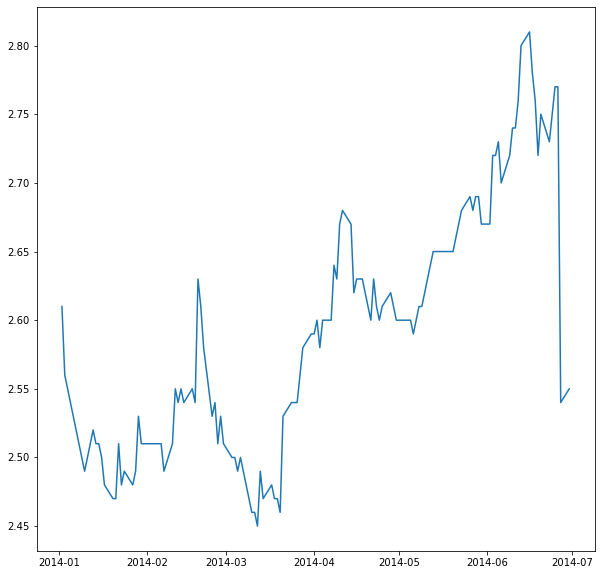

In [5]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
ChinaBank = pd.read_csv('ChinaBank.csv',index_col = 'Date',parse_dates=['Date'])
#ChinaBank.index = pd.to_datetime(ChinaBank.index)
sub = ChinaBank['2014-01':'2014-06']['Close']
train = sub.loc['2014-01':'2014-03']
test = sub.loc['2014-04':'2014-06']
plt.figure(figsize=(10,10))
print(sub.loc['2014-04':'2014-06'])
plt.plot(sub)
plt.show()

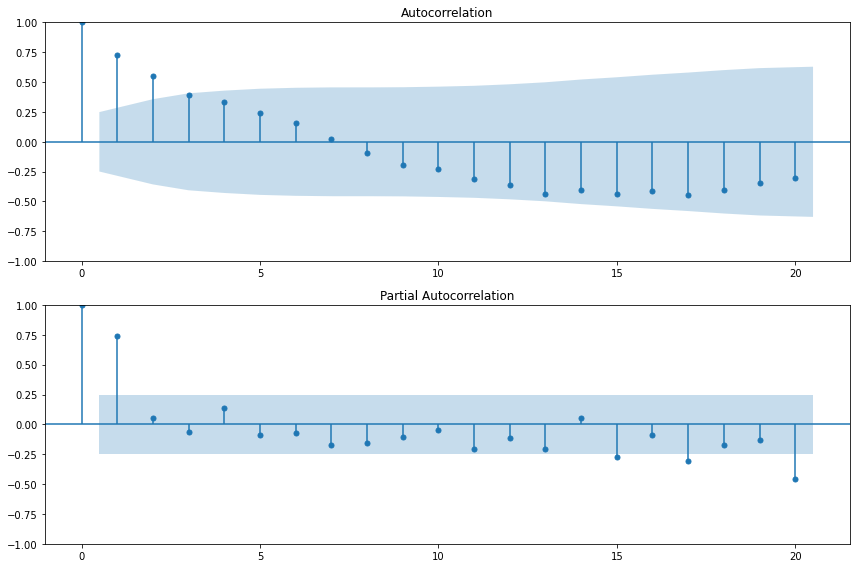

In [6]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

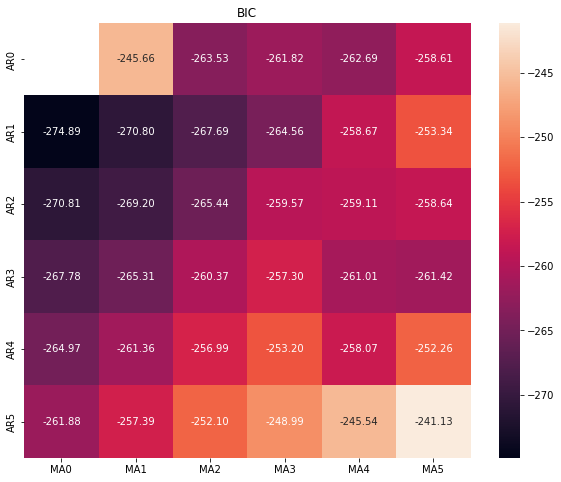

In [8]:
 #遍历，寻找适宜的参数
import itertools
import numpy as np
import seaborn as sns
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                            columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
for p,d,q in itertools.product(range(p_min,p_max+1),
                                range(d_min,d_max+1),
                                range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                            #enforce_stationarity=False,
                            #enforce_invertibility=False,
                            )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                mask=results_bic.isnull(),
                ax=ax,
                annot=True,
                fmt='.2f',
                )
ax.set_title('BIC')
plt.show()

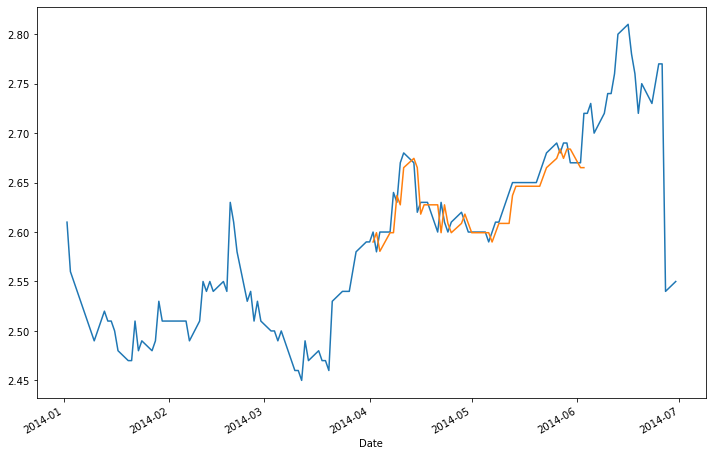

In [9]:
model = sm.tsa.ARIMA(sub, order=(1, 0, 0))
results = model.fit()
predict_sunspots = results.predict(start=63,end=107,dynamic=False)
#print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()

In [15]:
model = sm.tsa.ARIMA(train, order=(1, 0, 0))
results = model.fit()
print(results.forecast())
print(test[1])

62    2.580171
dtype: float64
2.6
